In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

Veri seti https://finance.yahoo.com/quote/CSV/history/ linki uzerinden 1 yillik veriler olarak alinmistir. burada Carriage Services, Inc. (CSV) sirketnin verileri listelenmektedir. Doysa adi 'CSV' olarak download edilmektedir.

In [2]:
stocks_df = pd.read_csv('CSV.csv')

stocks_df.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-31,29.940001,30.540001,29.840000,30.520000,29.997280,130400
1,2023-04-03,30.480000,30.889999,29.900000,30.139999,29.623787,104400
2,2023-04-04,30.240000,30.240000,28.780001,29.090000,28.591768,84900
3,2023-04-05,29.090000,29.299999,28.290001,28.440001,27.952904,110500
4,2023-04-06,28.420000,28.680000,27.900000,28.590000,28.100334,128100
...,...,...,...,...,...,...,...
240,2024-03-15,25.129999,25.830000,25.129999,25.580000,25.580000,185500
241,2024-03-18,25.520000,25.570000,25.150000,25.450001,25.450001,67700
242,2024-03-19,25.450001,26.010000,25.450001,25.980000,25.980000,72900
243,2024-03-20,25.980000,26.590000,25.780001,26.580000,26.580000,163600


In [3]:
stocks_df.shape

(250, 7)

In [4]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [5]:
stocks_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,27.082400,27.468320,26.672280,27.048360,26.812542,96384.000000
std,3.374653,3.375908,3.394846,3.351591,3.243357,62923.580731
min,20.660000,21.280001,18.059999,20.150000,20.059715,24700.000000
25%,24.660000,25.069999,24.322500,24.685000,24.544531,62150.000000
50%,26.685001,27.185001,26.370000,26.665000,26.516258,82600.000000
75%,29.930001,30.197499,29.360001,29.652501,29.242414,110225.000000
max,34.450001,35.590000,33.860001,34.189999,33.747028,582600.000000


1 yillik gunluk olarak verilen acilis ve kapanis verileri gorsellestirelim.

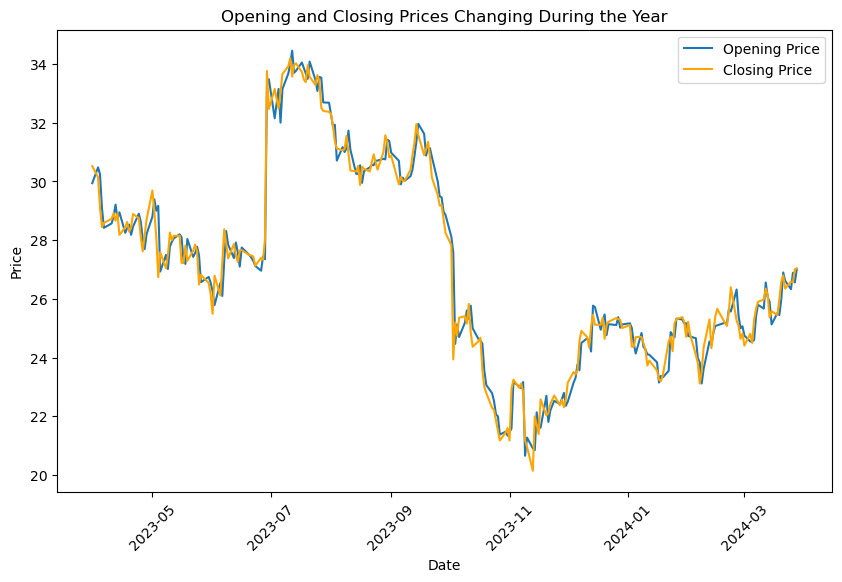

In [6]:
import matplotlib.pyplot as plt

# Veri setini yükleme (örnek olarak veri seti adı 'df' olarak kabul edilmiştir)
# df = pd.read_csv('veri_seti.csv')

# 'Date' sütununu datetime formatına çevirme
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

# 'Date' sütununu indeks olarak ayarlama
stocks_df.set_index('Date', inplace=True)

# Yıl içindeki değişen açılış ve kapanış fiyatlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(stocks_df['Open'], label='Opening Price')
plt.plot(stocks_df['Close'], label='Closing Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Opening and Closing Prices Changing During the Year')
plt.xticks(rotation=45)
plt.legend()
plt.show()

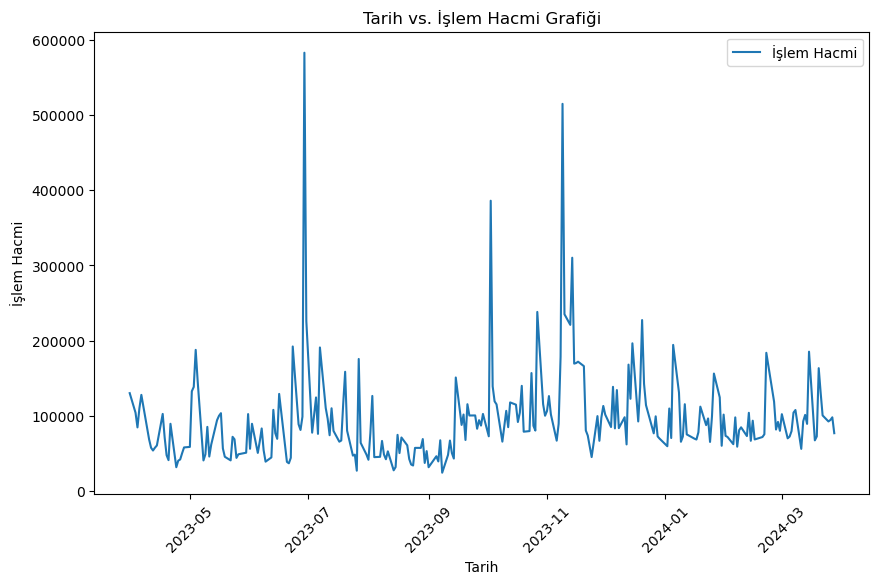

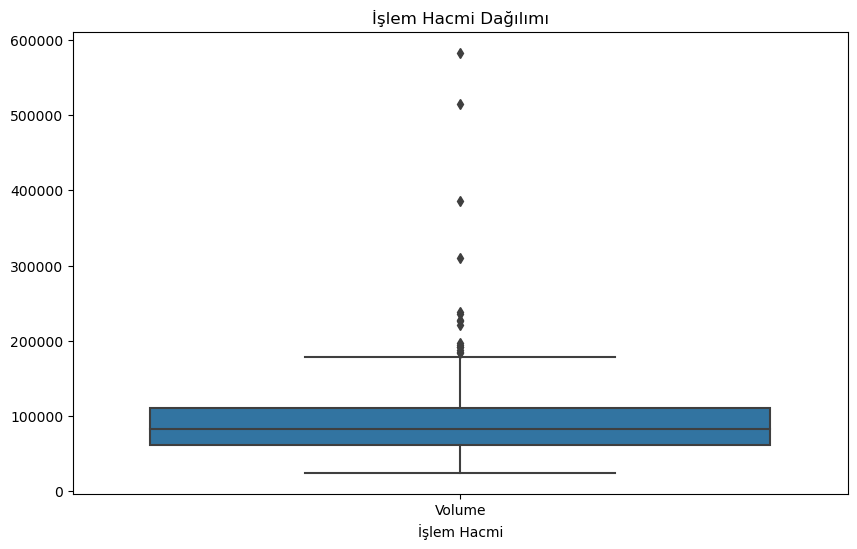

In [7]:
import seaborn as sns

# Hacimdeki değişimleri gösteren grafik
plt.figure(figsize=(10, 6))
plt.plot(stocks_df.index, stocks_df['Volume'], label='İşlem Hacmi')
plt.xlabel('Tarih')
plt.ylabel('İşlem Hacmi')
plt.title('Tarih vs. İşlem Hacmi Grafiği')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Hacimdeki anormallikler
plt.figure(figsize=(10, 6))
sns.boxplot(data=stocks_df[['Volume']])
plt.xlabel('İşlem Hacmi')
plt.title('İşlem Hacmi Dağılımı')
plt.show()


## Scaling
Clustering metodlari cok hassas ayarlamalar yapilmasi gerektigi icin scaling yapmak gerek. goruldugu gibi volume ve diger stunlardaki degerler birbirlerine cok uzak.

In [8]:
stocks_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-31,29.940001,30.540001,29.840000,30.520000,29.997280,130400
2023-04-03,30.480000,30.889999,29.900000,30.139999,29.623787,104400
2023-04-04,30.240000,30.240000,28.780001,29.090000,28.591768,84900
2023-04-05,29.090000,29.299999,28.290001,28.440001,27.952904,110500
2023-04-06,28.420000,28.680000,27.900000,28.590000,28.100334,128100


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(stocks_df)

In [10]:
scaled_data

array([[ 0.84848232,  0.91170806,  0.93496867,  1.03789644,  0.98389618,
         0.54167669],
       [ 1.00881947,  1.01559123,  0.95267798,  0.92428971,  0.86850887,
         0.12764818],
       [ 0.93755838,  0.82266453,  0.62210457,  0.61037749,  0.54967585,
        -0.18287321],
       ...,
       [-0.05712794, -0.10635291, -0.05380088, -0.1460025 , -0.07802096,
        -0.02681631],
       [-0.15511193, -0.06183159, -0.03314032, -0.01146826,  0.06100282,
         0.03051072],
       [-0.01852788, -0.05292697,  0.06130931, -0.00249904,  0.07027136,
        -0.30548935]])

# Clusterin Methods

## K-Means Clustering

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

cluster_labels = kmeans.fit_predict(scaled_data)


In [28]:
cluster_labels

array([0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2])

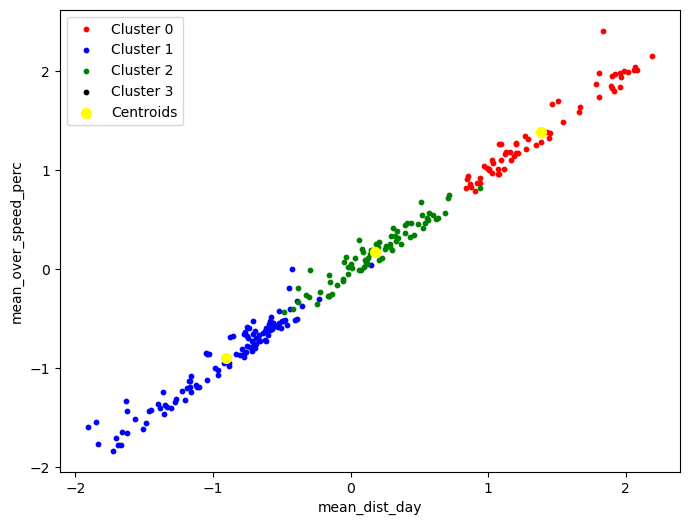

In [29]:
plt.figure(figsize=(8, 6))

# Visualising the clusters using scatter() method
plt.scatter(scaled_data[cluster_labels == 0, 0], scaled_data[cluster_labels == 0, 1], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(scaled_data[cluster_labels == 1, 0], scaled_data[cluster_labels == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_data[cluster_labels == 2, 0], scaled_data[cluster_labels == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_data[cluster_labels == 3, 0], scaled_data[cluster_labels == 3, 1], s = 10, c = 'black', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

In [34]:
# import silhouette score from sklearn library
from sklearn.metrics import silhouette_score

# Display the silhouette score values
print(f'Silhouette Score(n = 3): {silhouette_score(scaled_data, cluster_labels)}')

Silhouette Score(n = 3): 0.44535070760077233


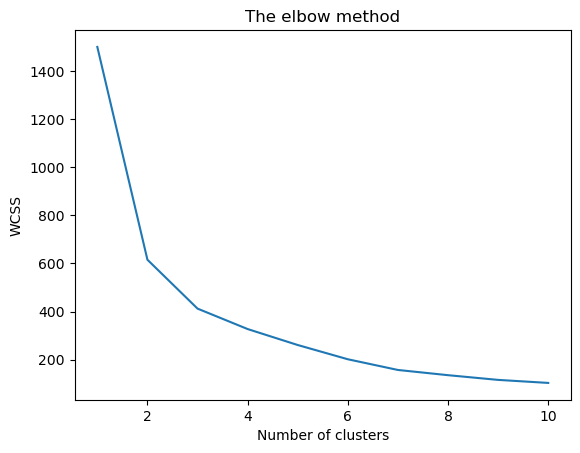

In [31]:
#Finding the optimum number of clusters for k-means classification

wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

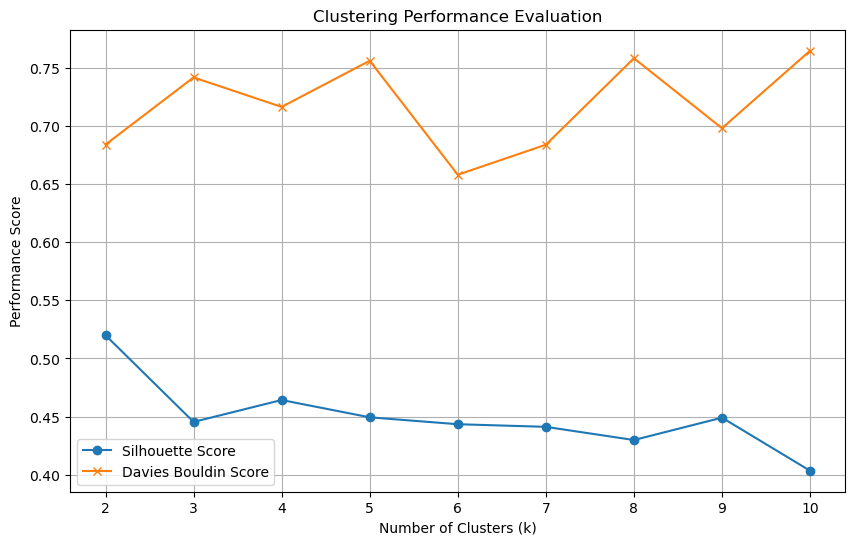

In [57]:
k_range = range(2, 11)  # 2 ila 10 arası küme sayıları için değerlendirme yapılacak

silhouette_scores = []
davies_bouldin_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    silhouette = silhouette_score(scaled_data, cluster_labels)
    davies_bouldin = davies_bouldin_score(scaled_data, cluster_labels)
    
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Sonuçların görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(k_range, davies_bouldin_scores, marker='x', label='Davies Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Performance Score')
plt.title('Clustering Performance Evaluation')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Choose the optimal number of clusters based on the metrics
optimal_clusters_db = np.argmin(davies_bouldin_scores) + 2  # +2 because the range starts from 2
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2  # +2 because the range starts from 2

print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

Optimal Clusters (Davies-Bouldin): 6
Optimal Clusters (Silhouette): 2


In [ ]:
# Function to perform hierarchical clustering and calculate metrics
def perform_clustering(n_clusters, data):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(data)
    db_index = davies_bouldin_score(data, labels)
    silhouette_avg = silhouette_score(data, labels)
    return db_index, silhouette_avg

In [32]:
stocks_df['Cluster'] = cluster_labels

In [33]:
stocks_df

,Open,High,Low,Close,Adj Close,Volume,Cluster
Date,,,,,,,
2023-03-31,29.940001,30.540001,29.840000,30.520000,29.997280,130400,0
2023-04-03,30.480000,30.889999,29.900000,30.139999,29.623787,104400,0
2023-04-04,30.240000,30.240000,28.780001,29.090000,28.591768,84900,2
2023-04-05,29.090000,29.299999,28.290001,28.440001,27.952904,110500,2
2023-04-06,28.420000,28.680000,27.900000,28.590000,28.100334,128100,2
...,...,...,...,...,...,...,...
2024-03-22,26.620001,26.620001,26.139999,26.350000,26.350000,100800,2
2024-03-25,26.330000,26.690001,26.320000,26.590000,26.590000,92800,2
2024-03-26,26.889999,27.110001,26.490000,26.559999,26.559999,94700,2


**Step 4:** Apply the `linkage()` function to `normalized_movements`, using `'complete'` linkage, to calculate the hierarchical clustering. Assign the result to `mergings`.

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(scaled_data, method='ward')

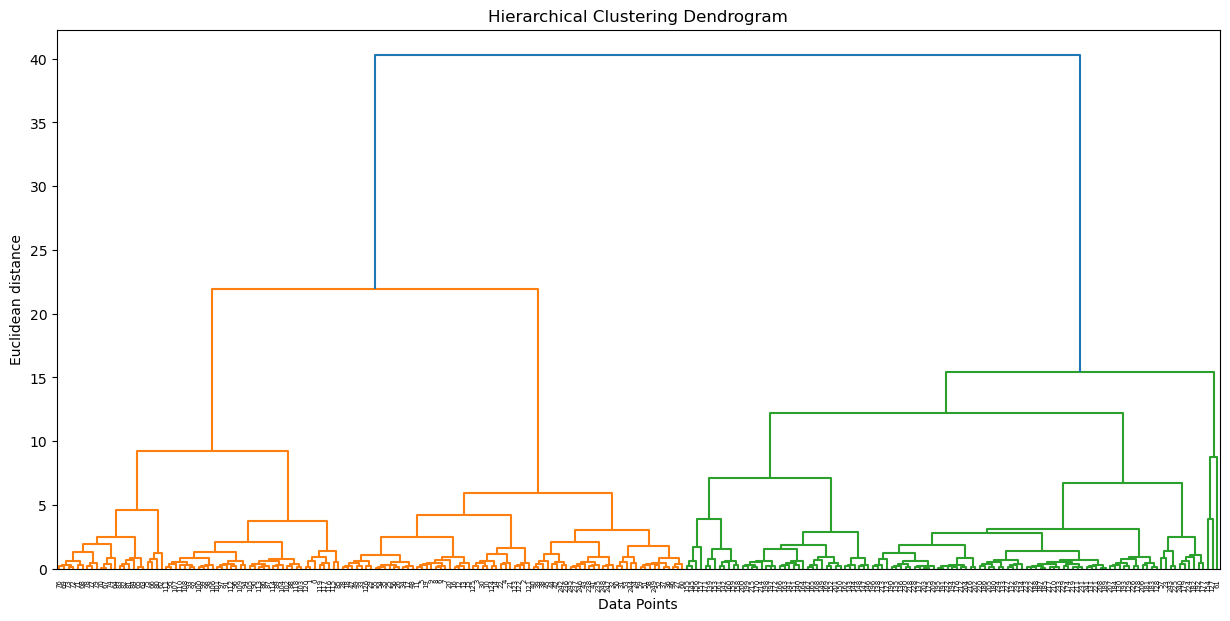

In [55]:
# Dendrogramı görselleştirme
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hiyerarşik kümeleme uygulama
linked = linkage(scaled_data, method='ward')

# Dendrogramı görselleştirme
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hiyerarşik Kümeleme Dendrogramı')
plt.xlabel('Veri Noktaları')
plt.ylabel('Uzaklık')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN kümeleme uygulama
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(scaled_data)
cluster_labels_dbscan = dbscan.labels_

# DBSCAN sonuçlarını görselleştirme
plt.scatter(data['Close'], data['Volume'], c=cluster_labels_dbscan, cmap='viridis')
plt.xlabel('Kapanış Fiyatı')
plt.ylabel('İşlem Hacmi')
plt.title('DBSCAN Kümeleme Sonuçları')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Veri setini yükleme (örnek olarak 'df' adıyla kabul edilmiştir)
# df = pd.read_csv('veri_seti.csv')

# 'Close' sütununu zaman serisi olarak ayarlama
ts = stocks_df['Close'].dropna()

# ARIMA modeli uygulama
model = ARIMA(ts, order=(5, 1, 0))  # p=5, d=1, q=0
results = model.fit()

# Model sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Gerçek Veri')
plt.plot(results.fittedvalues, color='red', label='Tahminler')
plt.title('ARIMA Modeli ile Kapanış Fiyatı Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

# Modelin performansını değerlendirme
mse = mean_squared_error(ts, results.fittedvalues)
print(f"Ortalama Kare Hata (MSE): {mse}")


In [ ]:
# ARIMA modelini uygulama
model = ARIMA(ts, order=(5, 1, 0))  # p=5, d=1, q=0
results = model.fit()

# Gelecek zaman dilimleri için tahmin yapma
forecast_steps = 10  # Örnek olarak, 10 adet gelecek zaman dilimi için tahmin yapalım
forecast = results.forecast(steps=forecast_steps)

# Tahmin edilen değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Gerçek Veri')
plt.plot(results.fittedvalues, color='red', label='Eğitilen Model')
plt.plot(forecast, color='green', label='Gelecek Tahminler')
plt.title('ARIMA Modeli ile Gelecek Kapanış Fiyatı Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

# Gelecek tahminlerini yazdırma
print("Gelecek Kapanış Fiyatı Tahminleri:")
print(forecast)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Veri setini yükleme ve zaman serisi olarak ayarlama
# Örnek olarak, son 2 haftalık veriyi alalım (varsayılan olarak, son 14 günlük veriyi kullanacağız)
end_date = stocks_df.index[-1]  # Veri setindeki en son tarih
start_date = end_date - pd.DateOffset(days=13)  # Son 2 haftalık dönemi belirleme
ts = stocks_df.loc[start_date:end_date, 'Close']  # Kapanış fiyatlarını zaman serisi olarak alır

# ARIMA modelini uygulama
model = ARIMA(ts, order=(5, 1, 0))  # p=5, d=1, q=0
results = model.fit()

# Gelecek 2 haftalık dönem için tahmin yapma
forecast_steps = 14  # Gelecek 2 hafta için 14 günlük tahmin yapalım
forecast = results.forecast(steps=forecast_steps)

# Tahmin edilen değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Gerçek Veri')
plt.plot(results.fittedvalues, color='red', label='Eğitilen Model')
plt.plot(forecast, color='green', label='Gelecek Tahminler')
plt.title('Son 2 Haftalık ARIMA Modeli ile Kapanış Fiyatı Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()

# Gelecek tahminlerini yazdırma
print("Gelecek 2 Haftalık Kapanış Fiyatı Tahminleri:")
print(forecast)
